# k-Nearest Neighbor (kNN) exercise

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic classification pipeline, and cross-validation.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
# Makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

this is jay

# Playing with a small dataset 



## Create a small dataset
Let's create a simple dataset and see how a kNN classifier will classify it. In this exercise, let's have two class labels 0 and 1, or y = {0,1}

Let's first create the X (features) of y=0. We can do this by randomly choosing datapoints with numpy's `np.random.randn function`:
```python
np.random.randn(rows,cols)*variance + mean
```
Find out more with `np.random.randn?`

In [54]:
# TODO : Create 10 entries (rows) with 2 features (columns: x and y coordinates) for y=0
# Set the mean to 3, and variance to 1.5
### START CODE HERE ###
X_train_zeros = np.random.randn(10, 2) * 1.5 + 3 
### END CODE HERE ###

# TODO : Create 10 entries (rows) with 2 features (columns) for y=1
# Set the mean to 1, and variance to 1.5
### START CODE HERE ###
X_train_ones = np.random.randn(10, 2) * 1.5 + 1
### END CODE HERE ###

# Check the generated numbers
print("Class 0 \n" + str(X_train_zeros))
print("Class 1 \n" + str(X_train_ones))

Class 0 
[[ 1.20320093  7.05106395]
 [ 2.23449169  4.40597064]
 [ 1.82635358  4.25528794]
 [ 0.60306227  4.08972087]
 [ 3.27519018  0.53317722]
 [ 4.38345344  4.71380604]
 [ 1.35642995  3.22678959]
 [ 3.27782377  2.48160066]
 [ 4.17151982 -1.19441186]
 [ 2.19920045  5.5742891 ]]
Class 1 
[[ 2.29006741  0.21049396]
 [ 0.52290054  0.81075498]
 [-1.86508121  0.00783379]
 [ 1.7287897  -0.41459996]
 [-2.70150538  0.88671041]
 [ 1.95836474  0.4099007 ]
 [ 1.48842216  2.03946613]
 [-0.29770731  2.13070681]
 [ 2.05567021 -0.10608975]
 [ 0.460243    0.10236447]]


### Visualize
Plot the generated data in a chart

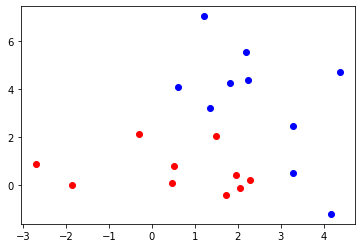

In [55]:
# Format: plt.plot(x, y, character/symbol)
#plt.plot?

# X_train_zeros[:,col] gets all the rows and column col
# The 'bo' parameter marks these points as blue circles
plt.plot(X_train_zeros[:,0], X_train_zeros[:,1], 'bo')
# The 'ro' parameter marks these points as red circles
plt.plot(X_train_ones[:,0], X_train_ones[:,1], 'ro')

So far, our data D has been split to 2 classes. 

Let's collate them into one X_train, and create y_train for the labels

In [56]:
# TODO : Combine X_train_zeros with X_train_ones to a single matrix
# Tip : Use np.concatenate to combine the two matrices
### START CODE HERE ###
X_train = np.concatenate((X_train_zeros, X_train_ones))
### END CODE HERE ###

# Labels
# TODO : Create an array of 10 zeros for the first class y=0
# Tip : Instead of manually creating an array, use np.zeros
### START CODE HERE ###
y_train_zeros = np.zeros(10)
### END CODE HERE ###

# TODO : Create an array of 10 ones for the first class y=1
# Tip : Instead of manually creating an array, use np.ones
### START CODE HERE ###
y_train_ones = np.ones(10)
### END CODE HERE ###

# TODO : Combine y_train_zeros with y_train_ones to a single array
# Tip : Use np.concatenate to combine the two arrays
### START CODE HERE ###
y_train = np.concatenate((y_train_zeros, y_train_ones))
### END CODE HERE ###

print("Our data set:")
print("Features (X) \t\t Label (y)")
for i in range(len(y_train)):
    print(str(X_train[i]) + " " + str(y_train[i]))

Our data set:
Features (X) 		 Label (y)
[1.20320093 7.05106395] 0.0
[2.23449169 4.40597064] 0.0
[1.82635358 4.25528794] 0.0
[0.60306227 4.08972087] 0.0
[3.27519018 0.53317722] 0.0
[4.38345344 4.71380604] 0.0
[1.35642995 3.22678959] 0.0
[3.27782377 2.48160066] 0.0
[ 4.17151982 -1.19441186] 0.0
[2.19920045 5.5742891 ] 0.0
[2.29006741 0.21049396] 1.0
[0.52290054 0.81075498] 1.0
[-1.86508121  0.00783379] 1.0
[ 1.7287897  -0.41459996] 1.0
[-2.70150538  0.88671041] 1.0
[1.95836474 0.4099007 ] 1.0
[1.48842216 2.03946613] 1.0
[-0.29770731  2.13070681] 1.0
[ 2.05567021 -0.10608975] 1.0
[0.460243   0.10236447] 1.0


In [57]:
X_train_0 = []
for i in range(len(y_train)):
    if y_train[i]==0.0:
        X_train_0.append(X_train[i])
X_train_1 = []
for i in range(len(y_train)):
    if y_train[i]==1.0:
        X_train_1.append(X_train[i])

In [58]:
X_train_0_ = np.array(X_train_0)
X_train_1_ = np.array(X_train_1)

In [59]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

__Your output should look like this:__
```
Our data set:
    Features (X) 		 Label (y)
[ 2.10736448  4.38938532] 0.0
[ 4.63171067  7.15449636] 0.0
[ 2.80923301  2.80047896] 0.0
...
[ 4.23634568  2.21686253] 1.0
[-0.5704331  1.0972354] 1.0
[-1.4629462   1.00977947] 1.0
```

### Create a test case
Let's add in a single test case to see how it will be classified by kNN

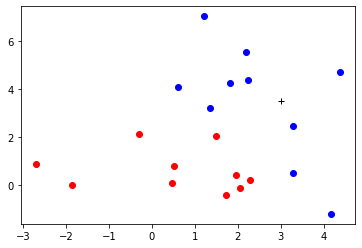

In [60]:
# New test case, see what will happen when you change this
X_test = np.array([[3,3.5]])
# There's a reason why this is an array inside an array. Each data 
# point is represented by an array (currently a array of length 2).
# Right now, there is only test data, but soon we many have more than 
# one.

# Plot the original
# TODO : plot the data from y=0 with blue circles
### START CODE HERE ###
plt.plot(X_train_0_[:,0], X_train_0_[:,1],'bo')
### END CODE HERE ###

# TODO : plot the data from y=1 with red circles
### START CODE HERE ###
plt.plot(X_train_1_[:,0], X_train_1_[:,1],'ro')
### END CODE HERE ###

# plot the test case in the figure (it should appear as a black plus sign)
# TODO : plot the test data with a black plus
### START CODE HERE ###
plt.plot(X_test[:,0],X_test[:,1],'k+')
### END CODE HERE ###

kNN gets the k nearest data points of the test case. Let's envision which nearby data points will be the nearest to our test case.

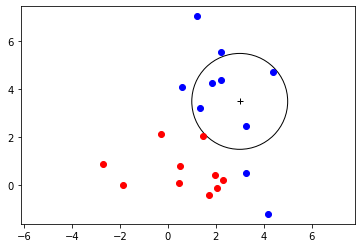

In [63]:
# Usual plots
# TODO : Plot the y=0 data, y=1 data, and the test data
### START CODE HERE ###
plt.plot(X_train_0_[:,0], X_train_0_[:,1],'bo')
plt.plot(X_train_1_[:,0], X_train_1_[:,1],'ro')
plt.plot(X_test[:,0],X_test[:,1],'k+')
### END CODE HERE ###

# TODO : Place in the radius/distance of the circle
### START CODE HERE ###
radius = 2
### END CODE HERE ###

circle= plt.Circle((X_test[:,0], X_test[:,1]), radius, color='k', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.axis('equal')
ax.add_artist(circle)

## Question: 

__Adjust the radius until it has more than 1 data point. How will you label the new test data?__

A: Label by number of points in radius

__How will you label it if the circle fits two data points -- one from each class?__

A: Choose the one closest to the center.

## Using scikit to create a k neighbors classifier

Now, we'll use scikit learn's KNeighbors classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier as knn
model = KNeighborsClassifier()

# Train the model 
model.fit(X_train, y_train)

# Test the model
model.predict(X_test)

array([0.])

The output should be the label of the data point nearest the test data. If the closest data point is blue it should say 0, and 1 if red.

## k Neighbors
We could also get the k nearest neighbors (not just the label)

We can use `model.kneighbors` to get the actual neighbors that are similar to our test data.

In [239]:
neighbors = 5
# TODO : Use kneighbors to get the most similar instances
### START CODE HERE ###
distances = model.kneighbors(X_test)
data_index = distances[1]
distances = distances[0]
### END CODE HERE ###

distances = np.squeeze(distances) # just some trivial processing...
data_index = np.squeeze(data_index) # just some trivial processing...

print("The " + str(neighbors) + " nearest neighbors:")
for i in range(neighbors):
    print(str(i+1) + ". " + str(X_train[data_index[i]]) + "\t dist: "+ str(distances[i]))

The 5 nearest neighbors:
1. [3.27782377 2.48160066]	 dist: 1.0556151121616977
2. [2.23449169 4.40597064]	 dist: 1.1860800090293289
3. [1.82635358 4.25528794]	 dist: 1.3956739535554368
4. [1.35642995 3.22678959]	 dist: 1.6661231748258922
5. [4.38345344 4.71380604]	 dist: 1.8404533474096252


__Your output should look like this:__
```
The 5 nearest neighbors:
1. [ 3.53308273  3.67087895]	 dist: 0.559800686629
2. [ 2.80923301  2.80047896]	 dist: 0.725066710211
3. [ 2.25856168  2.97214525]	 dist: 0.910143626575
4. [ 3.99191562  2.99839246]	 dist: 1.11153349516
5. [ 3.24464637  2.28448593]	 dist: 1.23988963153
```

Let's check the labels of the k nearest neighbors

In [240]:
y_train[data_index]
# We can place in an array as the indices to our array

array([0., 0., 0., 0., 0.])

## Hyperparameter k

By now, you would have noticed that the value of *k* will affect the result the result of the classifier. Choosing a good *k* is important, and we can do sample runs to see which *k* works best for us.

*Hyperparameters* like *k* affect how the model learns, and are usually "set" before modelling begins. They are different from regular *parameters* in a model. They are normally considered "higher level" because they also help estimate model *paramters*. *Parameters* can be estimated by some analytic solution based on the data, while *hyperparameters* can not. Since knn is non-parametric, we haven't encountered any *parameters* yet.

In sklearn's KNeighborsClassifier, we can control the value of *k*, too.

In [242]:
# You can change the test data to get a more conflicting labels in the neighbors
X_test=[[2,2]] 
# TODO : Add in the parameter for KNeighborsClassifier so that 
# it will choose 5 neighbors
### START CODE HERE ###
model = KNeighborsClassifier(n_neighbors=5)
### END CODE HERE ###

# TODO : Train the model with the train data
### START CODE HERE ###
model.fit(X_train, y_train)
### END CODE HERE ###

# TODO : Test the model with the test data
### START CODE HERE ###
model.predict(X_test)
### END CODE HERE ###

array([1.])

## Questions:

__How is the label predicted when k is more 1?__

A: The K nearest neighbors are labeled normally.

__What is the effect when you set the neighbors to 1?__

A: The closest point will be assigned to the nearest neighbor.

__What is the effect when you set the neighbors to 20?__

A: It will group all into one label.

### Test Data
So far, we only have one test case. But we can test more than one sample data at a time, we just need to populate more samples in our X_test.

In [243]:
# You may change this
X_test = [[0,0],[1,1],[2,2],[3,3],[4,4]]

In [244]:
model.predict(X_test)

array([1., 1., 1., 0., 0.])

The output should be an array with n elements, where n is the size of X_test. The predictions will come in the same order.

## Evaluating the performance

In reality, our validation/test data will have proper labels/ground truths to compare our model's predictions with.

In [245]:
X_test = [[0,0],[1,1],[2,2],[3,3],[4,4]]
y_test = [    1,    1,    1,    0,   0] 

In [246]:
# Assign the predictions to y_pred
y_pred = model.predict(X_test)

In [247]:
from sklearn.metrics import classification_report

# Print out the performance metrics given the actual results vs the predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



### Split data set
We don't need to manually split our training data from test data. Most of the time, manually splitting your data will be a source of partiality because you may un/consciously be choosing "good" or "easy-to-predict" data for the model to predict.

sklearn also has a module that allows us to easily split our data intro training and testing data. 

In [248]:
# TODO : Let's first combine X_train and X_test into a single X
### START CODE HERE ###
X = np.concatenate((X_train, X_test))
### END CODE HERE ###

# TODO : Let's first combine y_train and y_test into a single y
### START CODE HERE ###
y = np.concatenate((y_train, y_test))
### END CODE HERE ###

Use `train_test_split` to split our train from the test data. Make the test size 33% of the entire data.

In [250]:
from sklearn.model_selection import train_test_split

# We are going to reuse the variables here...
# TODO : Call train_test_split
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y)
### END CODE HERE ###

print("X train: \n"+ str(X_train))
print("y train: \n"+ str(y_train))
print("X test: \n"+ str(X_test))
print("y test: \n"+ str(y_test))

X train: 
[[ 4.17151982 -1.19441186]
 [ 3.          3.        ]
 [ 1.          1.        ]
 [-1.86508121  0.00783379]
 [ 1.82635358  4.25528794]
 [ 1.7287897  -0.41459996]
 [ 2.29006741  0.21049396]
 [ 1.35642995  3.22678959]
 [ 0.52290054  0.81075498]
 [ 1.20320093  7.05106395]
 [ 3.27519018  0.53317722]
 [ 2.          2.        ]
 [ 2.19920045  5.5742891 ]
 [ 0.60306227  4.08972087]
 [-0.29770731  2.13070681]
 [ 2.23449169  4.40597064]
 [ 1.48842216  2.03946613]
 [ 4.          4.        ]]
y train: 
[0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
X test: 
[[ 2.05567021 -0.10608975]
 [ 0.460243    0.10236447]
 [ 4.38345344  4.71380604]
 [ 1.95836474  0.4099007 ]
 [-2.70150538  0.88671041]
 [ 0.          0.        ]
 [ 3.27782377  2.48160066]]
y test: 
[1. 1. 0. 1. 1. 1. 0.]


## Question:

__If you run the previous cell ang call `train_test_split` again, is it possible to have a different train and test set?__

A: Yes.

And run do modelling like normal

In [251]:
# TODO : Create a knn classifier with a k of 3
### START CODE HERE ###
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
### END CODE HERE ###

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Do you think we will come up with a different result if we had a different train and test set?

## Cross validation
Cross validation can be used to decrease the randomness in performance metrics solely because of the test data. 

__What does cross validation do?__
Cross validation is a kind of splitting similar to what we did in the cells before. But it does multiple splits, so cross val will give us *k*   train and test data. It does in such a way that each data point will eventually become a validation data.

> The *k* in *k*-fold cross validation is different from *k* nearest neighbors

Cross validation is an alternative to split testing where we never shuffle train and test together in further experiments. It is a good option if you have few data points, and you cannot afford to lose any data as test data.

__Determining hyperparameters.__ Validation is also a way for us to determine a good value for our *k* in k-nearest neighbors. Instead of blindly choosing our hyperparameter, we will do multiple experiments using cross validation to see which one will give us the best results.

> You may have heard of *validation* and *test* data before. For now, we will treat them similarly. But they are two different things.

`cross_val_predict` does the data splitting, training, and cross-validation. Try getting the predictions using a *k* of 10.

In [278]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

k = 10
# TODO : get the predictions using cross_val_predict
### START CODE HERE ###
model = KNeighborsClassifier(n_neighbors=k)
y_pred = cross_val_predict(model, X, y, cv=3)
### END CODE HERE ###

# TODO : print the classification report
### START CODE HERE ###
print(classification_report(y, y_pred))
### END CODE HERE ###


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.87      1.00      0.93        13

   micro avg       0.92      0.92      0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



__The result should look something like this :__
```
              precision    recall  f1-score   support

        0.0       0.73      0.92      0.81        12
        1.0       0.90      0.69      0.78        13

avg / total       0.82      0.80      0.80        25
```

You may also use `cross_val_score` to get the actual accuracy from each fold in the k-fold cross validation.

In [282]:
# See the scores per fold (experiment)
k=3
model = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(model, X, y, cv=3)
print("Scores per fold :\n" + str(scores))
print("Average accuracy : " + str(np.sum(scores)/len(scores)))

Scores per fold :
[1.    0.875 0.75 ]
Average accuracy : 0.875


__The result should look something like this :__
```
Scores per fold :
[ 1.    0.75  0.    1.    0.5   1.    1.    1.    1.    1.  ]
Average accuracy : 0.825
```